## Feature Engineering

The functions to follow will take in the data as a pandas dataframe, and return a pandas dataframe with additional columns for the features added. 

In general, each function takes in an argument _stopwords_, which if initialized as a list of strings will be removed from the text. 


### An outline of the features included:

#### 1. Basics

#### 2. String Distance Features and Fuzzy Features

#### 3. Tf-Idf Features

#### 4. Word Embedding Features

#### 5. Linguistic Features


### 0.1 import packages and data

In [621]:
%matplotlib inline

# import matplotlib.pyplot as plt

# import numpy as np
# import pandas as pd
# from fuzzywuzzy import fuzz
# from gensim.models import KeyedVectors
# from operator import itemgetter
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis


# from sklearn.feature_extraction.text import TfidfVectorizer
# import re
# from nltk.corpus import stopwords

In [694]:
df = pd.read_csv("../data/processed/train.csv")

In [665]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,1,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,2,1,3,4,What is the story of Kohinoor Koh - i - Noor D...,What would happen if the Indian government sto...,0
2,3,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,4,3,7,8,Why am I mentally very lonely ? How can I solv...,Find the remainder when math 23 24 math is div...,0
4,5,4,9,10,"Which one dissolve in water quickly sugar , sa...",Which fish would survive in salt water ?,0


In [6]:
df.describe()

,Unnamed: 0,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202145.500000,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,116708.614503,157751.700002,159903.182629,0.482588
min,1.000000,0.000000,1.000000,2.000000,0.000000
25%,101073.250000,101072.250000,74437.500000,74727.000000,0.000000
50%,202145.500000,202144.500000,192182.000000,197052.000000,0.000000
75%,303217.750000,303216.750000,346573.500000,354692.500000,1.000000
max,404290.000000,404289.000000,537932.000000,537933.000000,1.000000


In [233]:
# small sample for testing
sample = df.sample(100)

### 0.2 Objects I will use repeatedly in this notebook

In [327]:
punctuation = ["?", "!", ",", ".", '"', "-"]
# nltk stopword list
stopwords = list(stopwords.words('english'))

### 1 Basic features

#### 1.1 Number of intersecting words

In [684]:
def len_intersection(df, stopwords = None):
    if stopwords:
        df['len_intersection_sw'] = df.apply(lambda x: len(set([w for w in x["question1"].strip().split(" ") if
                                    w not in punctuation and w not in stopwords]).intersection(
                    set([w for w in x["question2"].strip().lower().split(" ") if
                         w not in punctuation and w not in stopwords]))),
                 axis = 1)
        return(df)

    else:
        df['len_intersection'] = df.apply(lambda x: len(set([w for w in x["question1"].strip().split(" ") if
                                    w not in punctuation]).intersection(
                    set([w for w in x["question2"].strip().lower().split(" ") if
                         w not in punctuation]))),
                 axis = 1)
        return(df)

#### 1.2 Number of words in each sentence

In [685]:
def num_words_q1(df, stopwords = None):
    if stopwords:
        df['num_words_q1_sw'] = df['question1'].apply(lambda x: len([w for w in x.strip().lower().split(" ")
                                                          if w not in punctuation and w not in stopwords]))
        return(df)
    
    else:
        df['num_words_q1'] = df['question1'].apply(lambda x: len([w for w in x.strip().lower().split(" ") if
                                                          w not in punctuation]))
        return(df)

In [686]:
def num_words_q2(df, stopwords = None):
    if stopwords:
        df['num_words_q2_sw'] = df['question2'].apply(lambda x: len([w for w in x.strip().lower().split(" ")
                                                          if w not in punctuation and w not in stopwords]))
        return(df)
    
    else:
        df['num_words_q2'] = df['question2'].apply(lambda x: len([w for w in x.strip().lower().split(" ")
                                                          if w not in punctuation]))
        return(df)

#### 1.3 Difference in number of words 

Assumes functions *num_words_q1* and *num_words_q2* were already applied

In [695]:
def num_words_diff(df, stopwords = None):
    if stopwords:
        df['num_words_diff_sw'] = abs(df['num_words_q1_sw'] - df['num_words_q2_sw'])
        return(df)
    else:
        df['num_words_diff'] = abs(df['num_words_q1'] - df['num_words_q2'])
        return(df)

#### 1.4 Character length of each question

In [696]:
def num_chars_q1(df, stopwords = None):
    if stopwords:
        df['num_chars_q1_sw'] = df['question1'].apply(lambda x: sum([len([c for c in w if c not in punctuation]) for 
                                                                 w in x.strip().split() if
                                                                 w not in stopwords]))
        return(df)
    else:
        df['num_chars_q1'] = df['question1'].apply(lambda x: len(list([c for c in x.strip() if
                                                                       c not in punctuation])))
        return(df)

In [697]:
def num_chars_q2(df, stopwords = None):
    if stopwords:
        df['num_chars_q2_sw'] = df['question2'].apply(lambda x: sum([len([c for c in w if c not in punctuation]) for 
                                                                 w in x.strip().split() if
                                                                 w not in stopwords]))
        return(df)
    else:
        df['num_chars_q2'] = df['question2'].apply(lambda x: len(list([c for c in x.strip() if
                                                                       c not in punctuation])))
        return(df)

#### 1.5 Difference in number of characters between q1 and q2

assumes two functions above were already called

In [698]:
def num_chars_diff (df, stopwords = None):
    if stopwords:
        df['num_chars_diff_sw'] = abs(df['num_chars_q1_sw'] - df['num_chars_q2_sw'])
        return(df)
    else:
        df['num_chars_diff'] = abs(df['num_chars_q1'] - df['num_chars_q2'])
        return(df)

#### 1.End -  basic feature distribution

In [244]:
df = len_intersection(df)
df = num_words_q1(df)
df = num_words_q2(df)
df = num_words_diff(df)
df = num_chars_q1(df)
df = num_chars_q2(df)
df = num_chars_diff(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123b98e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125560b50>]], dtype=object)

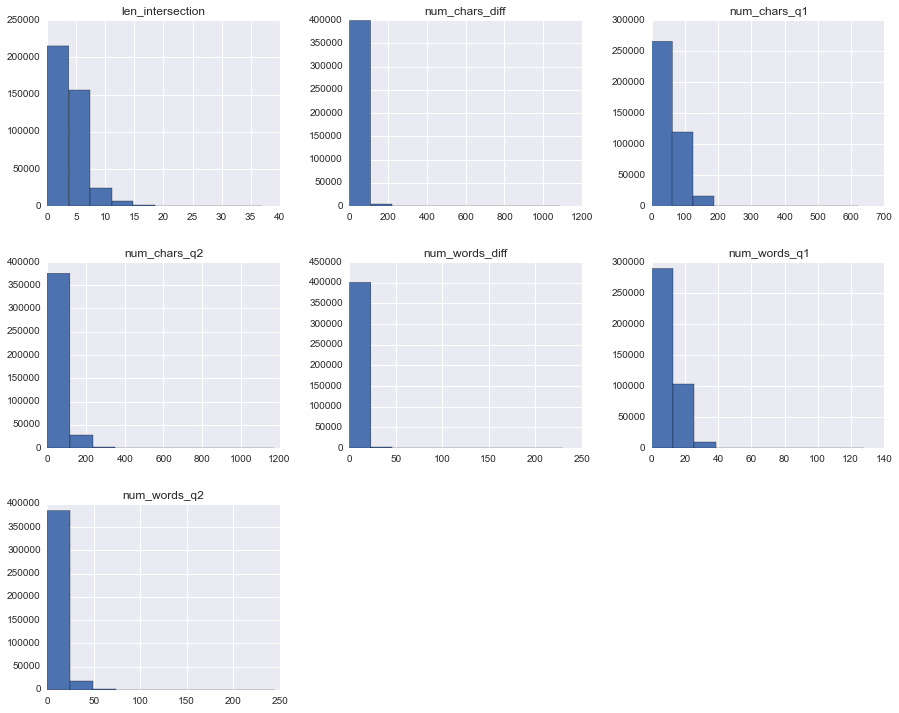

In [254]:
plt.figure()

df[['len_intersection',
   'num_words_q1',
   'num_words_q2',
   'num_words_diff',
   'num_chars_q1',
   'num_chars_q2',
   'num_chars_diff']].hist(figsize=(15, 12))

---

### 2. String distance features

Features inspired and some code used from Abhishek Thakur's excellent [blogpost](https://www.linkedin.com/pulse/duplicate-quora-question-abhishek-thakur/) and Marco Bonzanini's [FuzzyWuzzy turorial](https://marcobonzanini.com/2015/02/25/fuzzy-string-matching-in-python/)



#### 2.1 Partial character overlap ratio

This will capture if the questions start the same way. For example, "what is the best food" and "what is the best food to eat" have a 100% partial word overlap ratio.

In [699]:
# Partial word overlap. This will capture if the questions start the same way
def partial_ratio(df, stopwords = None):
    if stopwords:
        df['partial_ratio_sw'] = df.apply(lambda x: fuzz.partial_ratio(" ".join(
                    [w for w in x['question1'].lower().strip().split() if w not in punctuation and w not in stopwords]),
                    " ".join([w for w in x['question2'].lower().strip().split() if w not in punctuation and w not in stopwords])
                    ), axis = 1)
        return(df)
    else: 
        df['partial_ratio'] = df.apply(lambda x: fuzz.partial_ratio("".join([c for c in x['question1'].lower().strip() if
                                                   c not in punctuation]), "".join([c for c in x['question2'].lower().strip() if
                                                   c not in punctuation])), axis = 1)
        return(df)


#### 2.2 Partial token set ratio

Similar to the measure above, except here it is at a word level, and order does not matter. For example, "Barack Obama" and "Barack H. Obama" have 100% token set ratio match


In [700]:
# partial token set ratio
def partial_token_set_ratio(df, stopwords = None):
    if stopwords:
        df['partial_token_set_ratio_sw'] = df.apply(lambda x: fuzz.partial_token_set_ratio(" ".join(
                    [w for w in x['question1'].lower().strip().split() if w not in punctuation and w not in stopwords]),
                    " ".join([w for w in x['question2'].lower().strip().split() if w not in punctuation and w not in stopwords])
                    ), axis = 1)
        return(df)
    else: 
        df['partial_token_set_ratio'] = df.apply(lambda x: fuzz.partial_token_set_ratio("".join([c for c in x['question1'].lower().strip() if
                                                   c not in punctuation]), "".join([c for c in x['question2'].lower().strip() if
                                                   c not in punctuation])), axis = 1)
        return(df)

#### 2.3 Token set ratio

The partial token set ratio feature is extremely lenient. In fact, if any words are common between the two questions, it will be 100%. 

In this version, the sentences are considered as sets of tokens once more, but partial matches are not allowed


In [701]:
# partial token set ratio
def token_set_ratio(df, stopwords = None):
    if stopwords:
        df['token_set_ratio_sw'] = df.apply(lambda x: fuzz.token_set_ratio(" ".join(
                    [w for w in x['question1'].lower().strip().split() if w not in punctuation and w not in stopwords]),
                    " ".join([w for w in x['question2'].lower().strip().split() if w not in punctuation and w not in stopwords])
                    ), axis = 1)
        return(df)
    else: 
        df['token_set_ratio'] = df.apply(lambda x: fuzz.token_set_ratio("".join([c for c in x['question1'].lower().strip() if
                                                   c not in punctuation]), "".join([c for c in x['question2'].lower().strip() if
                                                   c not in punctuation])), axis = 1)
        return(df)

####  2.4 Partial token sort ratio

This doesn't consider the sentence as series of tokens, but instead of comparing the two sentences as a set of tokens (a strong assumption) we consider the match of the sorted tokens

For example the sentences "The food was great" and "It's great that the food was warm" have a 100% partial token set ratio, but a but a 78% partial token sort ratio

In [702]:
# partial token sort ratio
def partial_token_sort_ratio(df, stopwords = None):
    if stopwords:
        df['partial_token_sort_ratio_sw'] = df.apply(lambda x: fuzz.partial_token_set_ratio(" ".join(
                    [w for w in x['question1'].lower().strip().split() if w not in punctuation and w not in stopwords]),
                    " ".join([w for w in x['question2'].lower().strip().split() if w not in punctuation and w not in stopwords])
                    ), axis = 1)
        return(df)
    else: 
        df['partial_token_sort_ratio'] = df.apply(lambda x: fuzz.partial_token_set_ratio("".join([c for c in x['question1'].lower().strip() if
                                                   c not in punctuation]), "".join([c for c in x['question2'].lower().strip() if
                                                   c not in punctuation])), axis = 1)
        return(df)

####  2.5  token sort ratio

Again, removing the partial match allowance. 

In [703]:
# token sort ratio
def token_sort_ratio(df, stopwords = None):
    if stopwords:
        df['token_sort_ratio_sw'] = df.apply(lambda x: fuzz.token_sort_ratio(" ".join(
                    [w for w in x['question1'].lower().strip().split() if w not in punctuation and w not in stopwords]),
                    " ".join([w for w in x['question2'].lower().strip().split() if w not in punctuation and w not in stopwords])
                    ), axis = 1)
        return(df)
    else: 
        df['token_sort_ratio'] = df.apply(lambda x: fuzz.token_sort_ratio("".join([c for c in x['question1'].lower().strip() if
                                                   c not in punctuation]), "".join([c for c in x['question2'].lower().strip() if
                                                   c not in punctuation])), axis = 1)
        return(df)

#### 2.5 Weighted ratio

Finally, we can add a weighted ratio using fuzzywuzzy's `WRatio` algorithm. This computes a similarity score by taking a weighted average of several distance metrics, including the ones above. 

In [704]:
# token sort ratio
def wratio(df, stopwords = None):
    if stopwords:
        df['wratio_sw'] = df.apply(lambda x: fuzz.WRatio(" ".join(
                    [w for w in x['question1'].lower().strip().split() if w not in punctuation and w not in stopwords]),
                    " ".join([w for w in x['question2'].lower().strip().split() if w not in punctuation and w not in stopwords])
                    ), axis = 1)
        return(df)
    else: 
        df['wratio'] = df.apply(lambda x: fuzz.WRatio("".join([c for c in x['question1'].lower().strip() if
                                                   c not in punctuation]), "".join([c for c in x['question2'].lower().strip() if
                                                   c not in punctuation])), axis = 1)
        return(df)

#### 2.End Distribution of string distance features

In [257]:
df = partial_ratio(df)
df = partial_token_set_ratio(df)
df = token_set_ratio(df)
df = partial_token_set_ratio(df)
df = token_sort_ratio(df)
df = partial_token_sort_ratio(df)
df = wratio(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125cd4e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x145734410>]], dtype=object)

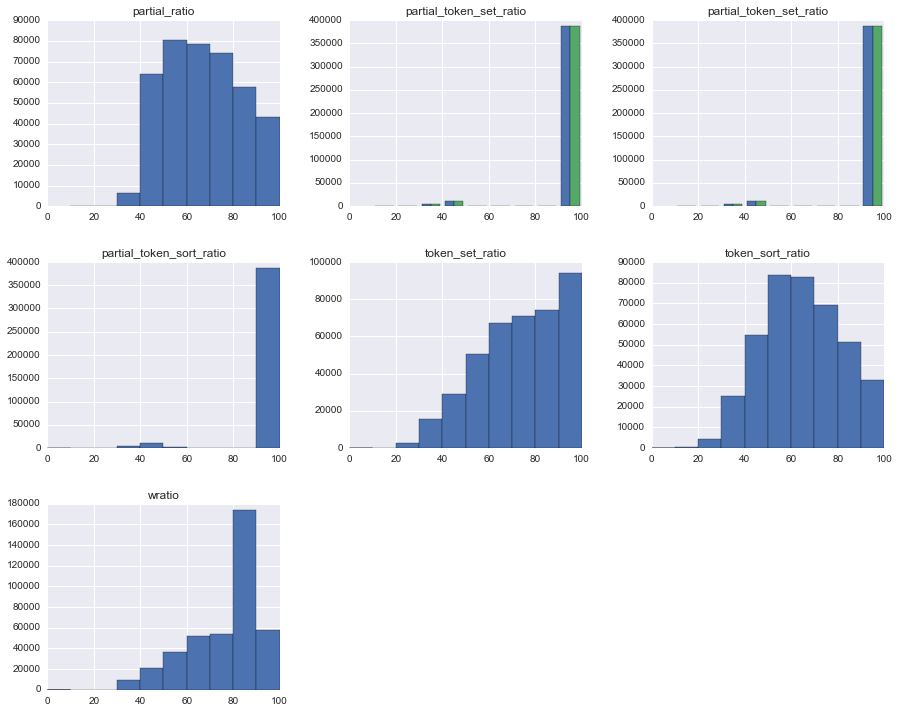

In [258]:
plt.figure()

df[['partial_ratio',
'partial_token_set_ratio',
'token_set_ratio',
'partial_token_set_ratio',
'token_sort_ratio',
'partial_token_sort_ratio',
'wratio']].hist(figsize=(15, 12))

### 3. Tf-Idf features



#### 3.0 Find Tf-Idf weights on the entire corpus.

In [436]:
# get all the corpus in one numpy array
values = df['question1'].append(df['question2']).apply(lambda x: re.sub('[ ]{2,}', ' ',
                                        re.sub('[^a-z]', ' ', x.lower().strip()))).values
# train tf-idf weights to the training quesitons
vectorizer = TfidfVectorizer(stop_words = stopwords, lowercase = True)
vectorizer.fit(values)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'w...n', u'ma', u'mightn', u'mustn', u'needn', u'shan', u'shouldn', u'wasn', u'weren', u'won', u'wouldn'],
        strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

Store the Tf-Idf weights in a dictionary

In [454]:
idf = vectorizer._tfidf.idf_
tfidf_weights = dict(zip(vectorizer.get_feature_names(), idf))

#### 3.1  and 3.2 Total Tf-Idf weight of words in the intersection of question1 and question2, and total Tf-Idf weight of words in the symmetric difference of question1 and question2 

In [409]:
# by default remove stopwords
def tf_idf_weight(df, stopwords = stopwords, norm = 'l2', vectorizer = vectorizer):


    # get the total tfidf weight for the words in the intersection of the two sentences. 
    df['word_intersection_tfidf_weight'] = df.apply(lambda x: vectorizer.transform([
            " ".join(set(x['question1'].split()).intersection(x['question2'].split()))]).sum(), axis = 1)
    
    # get the total tfidf weight for the words in the symmetric difference of the two sentences 
    df['word_symmetric_difference_tfidf_weight'] = df.apply(lambda x: vectorizer.transform([
            " ".join(set(x['question1'].split()).symmetric_difference(x['question2'].split()))]).sum(), axis = 1)
    
    return(df)

---
### 4. Word Embedding Features

For the following features, I used Facebooks pre trained `fasttext` word embeddings, trained on the wikipedia corpus. You can find this embedding [here](https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md).

Again, the inspiration for many of these features and the function `sent2vec` come from Abhishek Thakur's outstanding [blogpost](https://www.linkedin.com/pulse/duplicate-quora-question-abhishek-thakur/). (Thanks Abhishek!!!)

In [396]:
# load the pretrained word2vec embeddings 
model = KeyedVectors.load_word2vec_format('../data/embeddings/wiki.en.vec')

#### 4.0 A function which casts a sentence to a 300-dimensional vector. 

It works by taking the average position of the average position of the word embeddings in the sentence. 

In [766]:
def sent2vec(s, model = model,  stopwords = stopwords, punctuation = punctuation):
    words = [w for w in s.lower().strip() if w not in stopwords and w not in punctuation and w.isalpha()]
    # collect all embeddings of the words in the sentence
    M = []
    for w in words:
        M.append(model[w])
    # Take the average embedding position
    M = np.array(M)
    # average over the columns to get an embedding of the sentence
    v = M.mean(axis = 0)
    # if failed, return origin
    if np.all(np.isnan(v)):
        return np.repeat(0, 300)
    return(v)

#### 4.1 Embedding of sentence 1 and sentence 2

In [767]:
def q1_embedding(df, model = model, stopwords = stopwords, punctuation = punctuation):
    # create a column for embedding of q1
    df['q1_embedding'] = [sent2vec(s, model = model, stopwords = stopwords, punctuation = punctuation) for
                          s in df['question1']]
    return(df)

def q2_embedding(df, model = model, stopwords = stopwords, punctuation = punctuation):
    # create a column for embedding of q1
    df['q2_embedding'] = [sent2vec(s, model = model, stopwords = stopwords, punctuation = punctuation) for
                          s in df['question2']]
    return(df)

#### Embedding of word in sentence with highest Tf-Idf weight. 

Taking the average location of the word embeddings of a sentence may not produce meaningful embeddings. It may be more natural to try and select hte most "representative" or "important" word in a sentence, and study the embedding of that word. 

To find the most "important" word in a sentence I'll look at the word with the highest Tf-Idf weight, and then look at the embedding for that word.

In [796]:
# get the word with the highest tf_idf weight in the question for question1 and question2
def q1_highest_tfidf_weight(df, tfidf_weights = tfidf_weights):
    def max_word(x):
        try:
            return(max([(w, tfidf_weights[w]) for w in x.strip().lower().split() if 
                                         w in tfidf_weights], key=itemgetter(1))[0])
        except:
            return("")
            
    df['q1_highest_tfidf_weight'] = df['question1'].apply(lambda x: max_word(x))
    return(df)

# get the word with the highest tf_idf weight in the question for question1 and question2
def q2_highest_tfidf_weight(df, tfidf_weights = tfidf_weights):
    def max_word(x):
        try:
            return(max([(w, tfidf_weights[w]) for w in x.strip().lower().split() if 
                                         w in tfidf_weights], key=itemgetter(1))[0])
        except:
            return("")
    df['q2_highest_tfidf_weight'] = df['question2'].apply(lambda x: max_word(x))
    return(df)

Now add the embedding of the word with the highest tf_idf weight as a feature

In [809]:
def q1_max_tf_idf_embedding(df, model = model):
    df['q1_max_tf_idf_embedding'] = [model[w] if w in model else np.repeat(0,300) for w in df['q1_highest_tfidf_weight']]
    return(df)

def q2_max_tf_idf_embedding(df, model = model):
    df['q2_max_tf_idf_embedding'] = [model[w] if w in model else np.repeat(0,300) for w in df['q2_highest_tfidf_weight'] ]
    return(df)

#### 4.2 Euclidean distance between the sentence vector embeddings

In [637]:
def euclidean_distance_sentence_embeddings(df):
    df['euclidean_distance_sentence_embeddings'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(df['q1_embedding']),
                                                          np.nan_to_num(df['q2_embedding']))]
    return(df)

#### 4.3 Euclidean distance between words of highest Tf-Idf weight

In [634]:
def euclidean_distance_max_tfidf_word(df):
    df['euclidean_distance_max_tfidf_word'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(df['q1_max_tf_idf_embedding']),
                                                          np.nan_to_num(df['q2_max_tf_idf_embedding']))]
    return(df)

#### 4.4  Cosine distance between sentence embeddigns

In [934]:
def cosine_distance_sentence_embeddings(df):
    df['cosine_distance_sentence_embeddings'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(df['q1_embedding']),
                                                          np.nan_to_num(df['q2_embedding']))]
    
    # fill NaN values as discussed below
    fill = df[pd.isnull(df['cosine_distance_sentence_embeddings'])].apply(lambda x: 0 if
                        np.array_equal(x['q1_embedding'], x['q2_embedding'])  
                        else 1, axis = 1)
    
    if len(fill) > 0:
        df['cosine_distance_sentence_embeddings'] = df['cosine_distance_sentence_embeddings'].fillna(fill)
        
    return(df)

####  4.5 Cosine distance between words of highest Tf-Idf weight

Note: At the moment, when a word is out of the vocabulary, I send it's embedding to the origin. Thus, the cosine similiarity between the embedding of any word to that of a word which is outside the vocabulary is `NaN`. 

The cosine similarity represents the correlation between the two vectors. Thus, it's not so simple to fill these values. 

As a simple heuristic, I'll fill the `NaN` values generated with `1` if the two words are identical, and `0` otherwise. It's not ideal, but at least we won't say that identical vecotrs are orthogonal...

Suggestions would be awesome. 

In [932]:
def cosine_distance_max_tfidf_word(df):
    df['cosine_distance_max_tfidf_word'] = [cosine(x, y) for (x, y) in zip(df['q1_max_tf_idf_embedding'],
                                                          df['q2_max_tf_idf_embedding'])]
    
    # fill NaN values as discussed above
    fill = df[pd.isnull(df['cosine_distance_max_tfidf_word'])].apply(lambda x: 0 if
                        np.array_equal(x['q1_max_tf_idf_embedding'], x['q2_max_tf_idf_embedding'])  
                        else 1, axis = 1)
    
    if len(fill) > 0:
        df['cosine_distance_max_tfidf_word'] = df['cosine_distance_max_tfidf_word'].fillna(fill)
    return(df, fill)

#### 4.6 cityblock distance between sentence embeddings 


In [654]:
def cityblock_distance_sentence_embeddings(df):
    df['cityblock_distance_sentence_embeddings'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(df['q1_embedding']),
                                                          np.nan_to_num(df['q2_embedding']))]
    return(df)

####  4.7 Jaccard distance between sentence embeddigs:


In [656]:
def jaccard_distance_sentence_embeddings(df):
    df['jaccard_distance_sentence_embeddings'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(df['q1_embedding']),
                                                          np.nan_to_num(df['q2_embedding']))]
    return(df)

####  Braycurtis distance between sentence embeddings

In [657]:
def braycurtis_distance_sentence_embeddings(df):
    df['braycurtis_distance_sentence_embeddings'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(df['q1_embedding']),
                                                          np.nan_to_num(df['q2_embedding']))]
    return(df)

---

### 5. Linguistic features

(TODO - main purpose of this project)

---
### Calculating all features

In [815]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,len_intersection,len_intersection_sw,num_words_q1,...,cosine_distance_sentence_embeddings,cityblock_distance_sentence_embeddings,jaccard_distance_sentence_embeddings,braycurtis_distance_sentence_embeddings,q1_highest_tfidf_weight,q2_highest_tfidf_weight,q1_max_tf_idf_embedding,q2_max_tf_idf_embedding,euclidean_distance_max_tfidf_word,cosine_distance_max_tfidf_word
0,1,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,10,5,14,...,0.004921,3.938651,1.0,0.049871,guide,guide,"[-0.028461, -0.34315, 0.23021, -0.063865, -0.5...","[-0.028461, -0.34315, 0.23021, -0.063865, -0.5...",0.000000,3.250036e-08
1,2,1,3,4,What is the story of Kohinoor Koh - i - Noor D...,What would happen if the Indian government sto...,0,2,0,10,...,0.027946,10.689272,1.0,0.129334,noor,noor,"[0.037287, -0.31785, -0.23973, 0.38453, -0.037...","[0.037287, -0.31785, -0.23973, 0.38453, -0.037...",0.000000,4.103800e-08
2,3,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,3,2,14,...,0.010569,5.988954,1.0,0.075329,vpn,dns,"[-0.14387, 0.66254, -0.23895, 0.036253, 0.1737...","[-0.4192, 0.50649, -0.034163, -0.072171, 0.370...",5.495713,4.284846e-01
3,4,3,7,8,Why am I mentally very lonely ? How can I solv...,Find the remainder when math 23 24 math is div...,0,0,0,11,...,0.065936,15.007527,1.0,0.184240,mentally,remainder,"[-0.19269, -0.3287, -0.42276, 0.0051427, -0.16...","[-0.39733, -0.13798, 0.21101, 0.23799, 0.02578...",4.781672,8.190252e-01
4,5,4,9,10,"Which one dissolve in water quickly sugar , sa...",Which fish would survive in salt water ?,0,3,2,13,...,0.038453,11.145288,1.0,0.142762,di,salt,"[-0.11365, -0.034778, 0.081818, -0.20455, 0.01...","[-0.064408, -0.073121, -0.25947, 0.15424, -0.3...",6.219034,8.441631e-01


In [812]:
df.columns

Index([u'Unnamed: 0', u'id', u'qid1', u'qid2', u'question1', u'question2',
       u'is_duplicate', u'len_intersection', u'len_intersection_sw',
       u'num_words_q1', u'num_words_q1_sw', u'num_words_q2',
       u'num_words_q2_sw', u'num_words_diff', u'num_words_diff_sw',
       u'num_chars_q1', u'num_chars_q1_sw', u'num_chars_q2',
       u'num_chars_q2_sw', u'num_chars_diff', u'num_chars_diff_sw',
       u'partial_ratio', u'partial_ratio_sw', u'partial_token_set_ratio',
       u'partial_token_set_ratio_sw', u'token_set_ratio',
       u'token_set_ratio_sw', u'partial_token_sort_ratio',
       u'partial_token_sort_ratio_sw', u'wratio', u'wratio_sw',
       u'word_intersection_tfidf_weight',
       u'word_symmetric_difference_tfidf_weight', u'q1_embedding',
       u'q2_embedding', u'euclidean_distance_sentence_embeddings',
       u'cosine_distance_sentence_embeddings',
       u'cityblock_distance_sentence_embeddings',
       u'jaccard_distance_sentence_embeddings',
       u'braycurtis_di

In [705]:
# number of words in common
df = len_intersection(df)
# number of words in common (excluding stopwords)
df = len_intersection(df, stopwords = stopwords)
# number of words in q1
df = num_words_q1(df)
# number of words in q1 (excluding stopwords)
df = num_words_q1(df, stopwords = stopwords)
# number of words in q2 
df = num_words_q2(df)
# number of words in q2 (excluding stopwords)
df = num_words_q2(df, stopwords = stopwords)
# difference in the number of words
df = num_words_diff(df)
# difference in the number of words (excluding stopwords)
df = num_words_diff(df, stopwords = stopwords)
# number of characters in q1
df = num_chars_q1(df)
# number of characters in q1 (excluding stopwords)
df = num_chars_q1(df, stopwords = stopwords)
# number of characters in q2 
df = num_chars_q2(df)
# number of characters in q2 (excluding stopwords)
df = num_chars_q2(df, stopwords = stopwords)
# difference in number of characters
df = num_chars_diff(df)
# difference in number of characters(excluding stopwords)
df = num_chars_diff(df, stopwords = stopwords)

In [708]:
# partial ratio between sentences
df = partial_ratio(df)
# partial ratio between sentences (excluding stopwords)
df = partial_ratio(df, stopwords = stopwords)
# partial token ratio between sentences
df = partial_token_set_ratio(df)
# partial token ratio between sentences (excluding stopwords)
df = partial_token_set_ratio(df, stopwords = stopwords)
# token set ratio
df = token_set_ratio(df)
# token set ratio (stopwords excluded)
df = token_set_ratio(df, stopwords = stopwords)
# partial token sort ratio 
df = partial_token_sort_ratio(df)
# partial token sort ratio (stopwords excluded)
df = partial_token_sort_ratio(df, stopwords = stopwords)
# token sort ratio
df = token_set_ratio(df)
# token sort ratio (stopwords excluded)
df = token_set_ratio(df, stopwords = stopwords)
# w-ratio
df = wratio(df)
# w-ratio (stopwords excluded)
df = wratio(df, stopwords = stopwords)

In [711]:
# total tf-idf weight in words in sentence (excluding stopwords)
df = tf_idf_weight(df)

In [759]:
# sentence embedding of quesiton1 (stopwords excluded)
df = q1_embedding(df)
# sentence embedding of question2 (stopwords excluded)
df = q2_embedding(df)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: Mean of empty slice.


In [763]:
# euclidean distance between sentence embeddings
df = euclidean_distance_sentence_embeddings(df)
# cosine distance between sentence embeddings
df = cosine_distance_sentence_embeddings(df)
# cityblock distance between sentence embeddings
df = cityblock_distance_sentence_embeddings(df)
# Jaccard distance between sentence embeddings
df = jaccard_distance_sentence_embeddings(df)
# braycurtis distance between sentence embeddings
df = braycurtis_distance_sentence_embeddings(df)

In [797]:
# word in question1 with highest tfidf weight
df = q1_highest_tfidf_weight(df)
# word in question2 with highest tfidf weight
df = q2_highest_tfidf_weight(df)

In [810]:
# embedding of word in question1 with highest tfidf weight
df = q1_max_tf_idf_embedding(df)
# embedding of word in question2 with highest tfidf weight
df = q2_max_tf_idf_embedding(df)

In [811]:
# euclidean distance between embedding of words of highest tfidf weight
df = euclidean_distance_max_tfidf_word(df)
# cosine distance between embeddings of words of highest tfidf wieght
df = cosine_distance_max_tfidf_word(df)

---

#####  A look at the features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2e9924490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2fa747210>]], dtype=object)

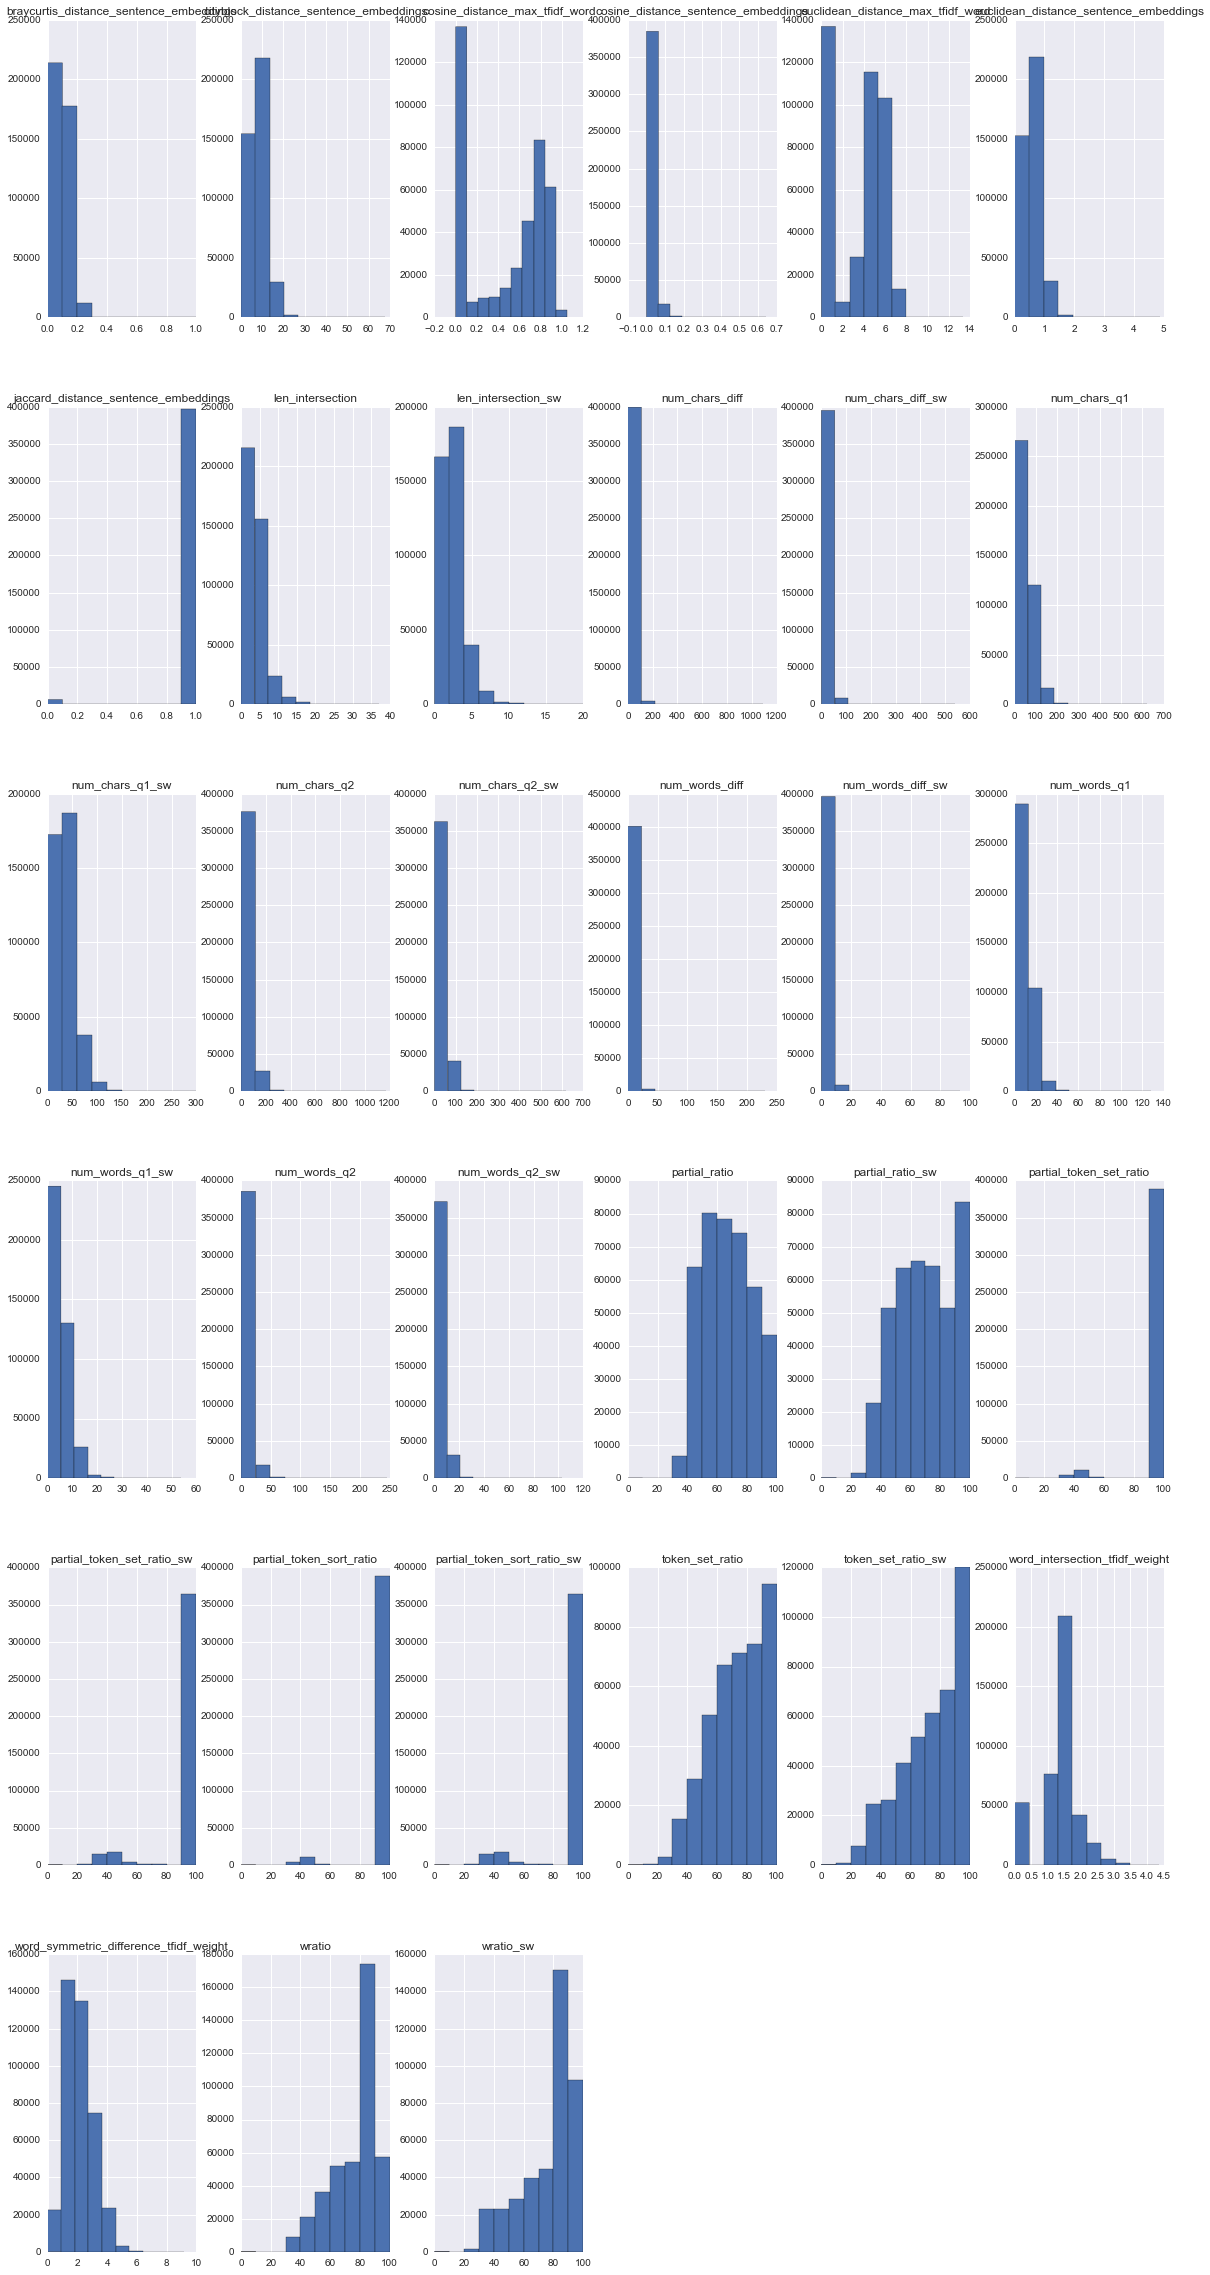

In [819]:
plt.figure()
df[[ u'len_intersection', u'len_intersection_sw',
       u'num_words_q1', u'num_words_q1_sw', u'num_words_q2',
       u'num_words_q2_sw', u'num_words_diff', u'num_words_diff_sw',
       u'num_chars_q1', u'num_chars_q1_sw', u'num_chars_q2',
       u'num_chars_q2_sw', u'num_chars_diff', u'num_chars_diff_sw',
       u'partial_ratio', u'partial_ratio_sw', u'partial_token_set_ratio',
       u'partial_token_set_ratio_sw', u'token_set_ratio',
       u'token_set_ratio_sw', u'partial_token_sort_ratio',
       u'partial_token_sort_ratio_sw', u'wratio', u'wratio_sw',
       u'word_intersection_tfidf_weight',
       u'word_symmetric_difference_tfidf_weight', 
       u'euclidean_distance_sentence_embeddings',
       u'cosine_distance_sentence_embeddings',
       u'cityblock_distance_sentence_embeddings',
       u'jaccard_distance_sentence_embeddings',
       u'braycurtis_distance_sentence_embeddings', 
       u'euclidean_distance_max_tfidf_word',
       u'cosine_distance_max_tfidf_word']].hist(figsize=(20, 40))

---

### Save data

I'll save this as a csv, and pickle the object. 

In [814]:
#save to csv
df.to_csv("features.csv", index = False)

In [778]:
sample = q1_highest_tfidf_weight(sample)